# Vinícius Renato Rocha Geraldo

## Incluindo as bibliotecas

In [0]:
import math 
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import linalg
from pylab import *
from sympy import Symbol, Derivative, symbols

f = lambda x, a, b, c, d, interpolacao:  d + c*(interpolacao - x) + b*((interpolacao-x)**2) + a*((interpolacao-x)**3)

# Newton

In [0]:
def newton(x, y, z):
  tam = len(x)
  r = 0 
  dely = np.copy(y)
  
  for i in range (tam):
    dely[i] = y[i]
  
  for k in range (1, tam):
    for i in range (tam, k, -1):
      dely[i - 1] = (dely[i - 1] - dely[i - 2])/(x[i - 1] - x[i - k -1]) 
      
      '''
      É feito um valor a menos do vetor pois no resultado está gerando 1 coeficiente a mais do dado, ou seja, diminui 1 o tamanho do vetor para não acontecer o erro: "index 6 is out of bounds for axis 0 with size 6 "
      '''
  r = dely[tam - 1]
  
  for i in range (tam - 1, 0, -1):
    r = r * (z - x[i - 1]) + dely[i - 1]
  
  
  print("O valor de z", z, "interpolado é:", r)
    

## Lista de Exercícios 8 - Newton

In [19]:
# Letra b
'''
Como visto em nas aulas teoricas para cada cálculo do polinômio associado existe um 
erro relacionado com o valor interpolado e isso se aplica para as questões dos anos
vemos que o erro associado ao ano de 1950 gera um resultado muito inesperado e isso ocorre
uma inconsistência do valor encontrado, já para o ano de 2014 o erro associado ao polinômio é bem baixo,
ou seja, gera resultados esperados com o interpolador. Para os resultados dos anos de 1975 acontece um valor mais aproximado
porque existem intervalos que abrangem o resultado na tabela informada, já para o ano de 2020 existe uma estimativa maior do valor
'''

## Questão 1
print('Letra A')
x = [1960, 1970, 1980, 1990, 2000, 2010]
y = [179.323, 203.302, 226.542, 249.633, 281.422, 308.746]
z = 1950
newton(x, y, z)

print("--------------------------------------------")

z = 1975
newton(x, y, z)

print("--------------------------------------------")

z = 2014
newton(x, y, z)

print("--------------------------------------------")

z = 2020
newton(x, y, z)


Letra A
O valor de z 1950 interpolado é: 192.5390000000002
--------------------------------------------
O valor de z 1975 interpolado é: 215.52571484375
--------------------------------------------
O valor de z 2014 interpolado é: 306.2148876159999
--------------------------------------------
O valor de z 2020 interpolado é: 266.1649999999996


In [20]:
print('Questão 2')
x = [0.25, 0.5, 1, 1.25]
y = [25.2, 49.2, 96.4, 119.4]
z = 0.75
newton(x, y, z)
print("Esse valor interpolado está em segundos")

Questão 2
O valor de z 0.75 interpolado é: 72.96666666666667
Esse valor interpolado está em segundos


# Lagrange

In [0]:
def lagrange(x, y, z):
  tam = len(x)
  r = 0
  for i in range (tam):
    c = 1
    d = 1
    for j in range (tam):
      if (i != j):
        c = c*(z - x[j])
        d = d*(x[i] - x[j])
    
    r = r + (y[i] * c/d)
  
  print("O valor de z", z , "interpolado é:", r)

## Lista de Exercício 8 - Lagrange

In [22]:
# Letra b
'''
Como visto em nas aulas teoricas para cada cálculo do polinômio associado existe um 
erro relacionado com o valor interpolado e isso se aplica para as questões dos anos
vemos que o erro associado ao ano de 1950 gera um resultado muito inesperado e isso ocorre
uma inconsistência do valor encontrado, já para o ano de 2014 o erro associado ao polinômio é bem baixo,
ou seja, gera resultados esperados com o interpolador. Para os resultados dos anos de 1975 acontece um valor mais aproximado
porque existem intervalos que abrangem o resultado na tabela informada, já para o ano de 2020 existe uma estimativa maior do valor
'''

## Questão 1
print('Letra A')
x = [1960, 1970, 1980, 1990, 2000, 2010]
y = [179.323, 203.302, 226.542, 249.633, 281.422, 308.746]
z = 1950
lagrange(x, y, z)

print("--------------------------------------------")

z = 1975
lagrange(x, y, z)

print("--------------------------------------------")

z = 2014
lagrange(x, y, z)

print("--------------------------------------------")

z = 2020
lagrange(x, y, z)




Letra A
O valor de z 1950 interpolado é: 192.53900000000033
--------------------------------------------
O valor de z 1975 interpolado é: 215.52571484375002
--------------------------------------------
O valor de z 2014 interpolado é: 306.21488761600017
--------------------------------------------
O valor de z 2020 interpolado é: 266.1649999999995


## Lista de Exercício 8 - Questão 2

In [32]:
# Questão 2
x = [0, 6, 10, 13, 17, 20, 28]
y1 = [6.67, 17.33, 42.67, 37.33, 30.10, 29.31, 28.74]
y2 = [6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89]

z = 14
print('Utilizando a Amostra 1')
lagrange(x, y1, z)
print('\nUtilizando a Amostra 2')
lagrange(x, y2, z)

Utilizando a Amostra 1
O valor de z 14 interpolado é: 34.61205269311793

Utilizando a Amostra 2
O valor de z 14 interpolado é: 13.562466604340404


# Spline Cúbica Natural

In [0]:
def spline(x, y, n):
  info = 0
  s2 = []
  if (n < 3):
    info = -1
    exit(info)
  
  ordenado = True
  
  for i in range (2, n):
    ordenado = ordenado and x[i - 1] < x[1]

  if (ordenado):
    info = -2
    exit(info)
  
  m = n - 2

  # Construção do sistema linear tridiagonal simétrico
  
  hA = x[1] - x[0]
  print(hA)
  deltaA = (y[1] - y[0])/hA

  for i in range (1, m):
    ip1 = i + 1
    ip2 = i + 2
    hB = x[ip2] - x[ip1]
    deltaB = (y[ip2] - y[ip1])/hA
    e[i] = hB
    d[i] = 2 * (hA + hB)
    s2[ip1] = 6 * (deltaB - deltaA)
    hA = hB
    deltaA = deltaB
  
  # Eliminação de Gauss
  for i in range (2, m):
    ip1 = i+1
    im1 = i-1
    t = e[im1]/d[im1]
    d[i] = d[i] - t*e[im1]
    s2[ip1] = s2[ip1] - t*s2[i]
  
  # Solução por substituição retroativas
  s2[m+1] = s2[m+1]/d[m]
  for i in range (m, 2, -1):
    ip1 = i + 1
    im1 = i - 1
    s2[i] = (s2[i] - e[im1] * s2[ip1]) / d[im1]
  
  s2[1] = 0
  s2[n] = 0

  print(s2)

## Meu Spline Cúbico Natural


In [0]:
def spline_cubico(x, y, interpolacao):
  tam = len(x)
  a = np.zeros(tam - 1)
  b = np.zeros(tam - 1)
  c = np.zeros(tam - 1)
  d = np.zeros(tam - 1)
  h = np.zeros(tam - 1)
  g = np.zeros(tam - 1)
  resol = np.zeros(tam - 1)
  matriz_x = np.zeros((tam, tam), dtype=np.float64)
  matriz_y = np.zeros((tam))
  
  
  # Calculando o intevalo de h
  for k in range (tam - 1):
    h[k] = (x[k + 1] - x[k])

  matriz_x[tam - 1][tam - 1] = 1
  matriz_x[0][0] = 1
  aux = 0
  for i in range(1, tam - 1):
    aux = i
    for j in range(tam):
      if(i == j):
        matriz_x[i][j] = 2*(h[j] + h[j-1])

      elif((i - j) != 1 and (j - i) != 1):
        matriz_x[i][j] = 0

      else:
        matriz_x[i][j] = h[aux]
        aux = aux - 1
  
  # Encontrando o vetor Y para o sistema de equação lineares
  for i in range (1, tam - 1):
    matriz_y[i] = 6 * (((y[i + 1] - y[i])/h[i]) - ((y[i] - y[i - 1])/h[i - 1]))
  
  # Resolução do sistema de matriz Ax = b
  g = np.linalg.solve(matriz_x, matriz_y)
  print("Matriz A")
  print(matriz_x)
  print("Matriz B")
  print(matriz_y)
  print("Vetor de solução g")
  print(g)

  # Encontrando os valores dos parâmetros a, b, c, d para assim encontrar o polinômio associado
  for k in range(tam - 1):
    a[k] = (g[k] - g[k+1])/(6*h[k])
    b[k] = g[k+1]/2
    c[k] = (y[k] - y[k+1]/h[k]) + (2*h[k]*g[k+1] - g[k]*h[k])/6
    d[k] = y[k+1]

  for k in range(tam - 1):
    resol[k] = a[k]*((interpolacao - x[k+1])**3) + b[k]*((interpolacao - x[k+1])**2) + c[k]*(interpolacao - x[k+1]) + d[k] 
  
  print('\n')
  print('Solução geral para a função desejada')
  for k in range(tam - 1):
    if(interpolacao > x[k] and interpolacao < x[k + 1]):
      print("S%d" %k)
      print(resol[k])
      numero_pontos = 300
      curve = np.linspace(x[k], x[k+1], numero_pontos)
      '''
      Utilizo uma função lambda definida como sendo padrão para qualquer cálculo 
      nisso consigo plotar qualquer gráfico. Passo os valores dos resultados de a, b, c, d, interpolação para ir gerando os resultando em f(x, a, b, c, d, interpolacao)
      e assim gerando o gráfico desejado
      
      '''
      values = [f(value, a[k], b[k], c[k], d[k], interpolacao) for value in curve] 
      plt.plot(curve, values, linestyle='-', color = 'blue', alpha = 0.7)
      plt.plot(curve[0], values[0], marker = 'o', color = 'b')
      plt.plot(curve[299], values[299], marker = 'o', color = 'b')
      plt.axhline(0, color = 'gray')
      plt.axvline(0, color = 'gray')
      plt.grid(True)
      plt.show()

## Lista 9 - Spline Cúbico Natural

Letra A - Questão 1 e 2
Matriz A
[[1. 0.]
 [0. 1.]]
Matriz B
[0. 0.]
Vetor de solução g
[0. 0.]


Solução geral para a função desejada
S0
27.32893266666668


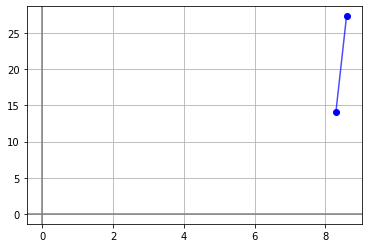


----------------------------------------------------

Letra B - Questão 1 e 2
Matriz A
[[1. 0.]
 [0. 1.]]
Matriz B
[0. 0.]
Vetor de solução g
[0. 0.]


Solução geral para a função desejada
S0
0.9647745929999999


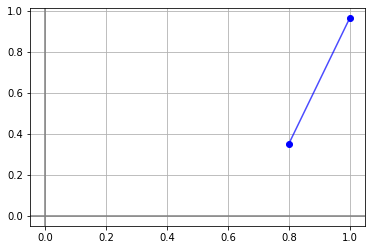


----------------------------------------------------

Letra C - Questão 1 e 2
Matriz A
[[1.   0.   0.  ]
 [0.25 1.   0.25]
 [0.   0.   1.  ]]
Matriz B
[0.    9.753 0.   ]
Vetor de solução g
[0.    9.753 0.   ]


Solução geral para a função desejada
S0
0.41361612400000003


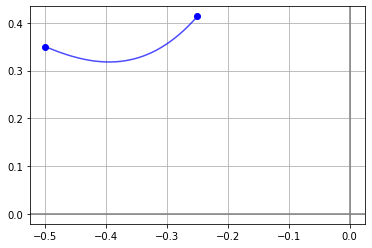


----------------------------------------------------

Letra D - Questão 1 e 2
Matriz A
[[1.  0.  0.  0. ]
 [0.1 0.4 0.1 0. ]
 [0.  0.1 0.4 0.1]
 [0.  0.  0.  1. ]]
Matriz B
[ 0.        -2.7555162 -2.9258508  0.       ]
Vetor de solução g
[ 0.       -5.397476 -5.965258  0.      ]


Solução geral para a função desejada
S1
0.02197009858333334


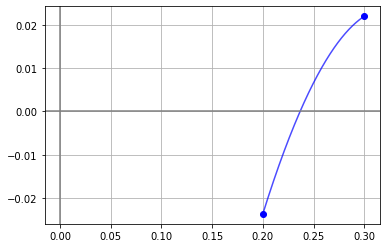

In [33]:
print('Letra A - Questão 1 e 2')
x1 = [8.3, 8.6]
y1 = [17.56492, 18.50515]
interpolacao = 8.4 
spline_cubico(x1, y1, interpolacao)

print('\n----------------------------------------------------\n')

print('Letra B - Questão 1 e 2')
x2 = [0.8, 1.0]
y2 = [0.22363362, 0.65809197]
interpolacao = 0.9
spline_cubico(x2, y2, interpolacao)

print('\n----------------------------------------------------\n')

print('Letra C - Questão 1 e 2')
x3 = [-0.5, -0.25, 0]
y3 = [-0.0247500, 0.3349375, 1.1010000]
interpolacao = -0.33
spline_cubico(x3, y3, interpolacao)

print('\n----------------------------------------------------\n')
print('Letra D - Questão 1 e 2')
x4 = [0.1, 0.2, 0.3, 0.4]
y4 = [-0.62049958, -0.28398668, 0.00660095, 0.24842440]
interpolacao = 0.25
spline_cubico(x4, y4, interpolacao)


#x = [0.1, 0.2, 0.3, 0.4]
#y = [-0.62049958, -0.28398668, 0.00660095, 0.24842440]
#interpolacao = 2
#spline_cubico(x, y, interpolacao)

#print('\n----------------------------------------------------\n')

#x = [0, 0.5, 1.0, 1.5, 2.0]
#y = [3, 1.8616, -0.5571, -4.1987, -9.0536]
#interpolacao = 2
#spline_cubico(x, y, interpolacao)
#


# MMQ

In [0]:
def MMQ(x, y, tipo):
  tam = len(x)
  raizes = np.zeros(tam)
  x_y_new = np.zeros(tam)
  xElevado = np.zeros(tam)
  for i in range (tam):
    x_y_new[i] = x[i] * y[i]
    xElevado[i] = math.pow(x[i], 2)
  
  x_sum = sum(x)
  #print(x_sum)
  y_sum = sum(y)
  #print(y_sum)
  x_y_sum = sum(x_y_new)
  #print(x_y_sum)
  xElevadoSum = sum(xElevado)
  #print(xElevadoSum)

  #calculando o valor de A e B
  a = ((tam * x_y_sum) - (x_sum * y_sum)) / ((tam * xElevadoSum) - (x_sum * x_sum))
  print(a)
  b = ((x_sum * x_y_sum) - (y_sum * xElevadoSum)) / ((x_sum * x_sum) - (tam * xElevadoSum))
  print(b)

  if(tipo == 1):
    f = lambda x: a*x + b
    for i in range (tam):
      raizes[i] = f(x[i])
    print(raizes) 
    plotGrafico(f, y, raizes)
  
  elif(tipo == 2):
    f = lambda x: a*(x**2) + b*(1/x)
    for i in range (tam):
      raizes[i] = f(x[i])
    print(raizes) 
    plotGrafico(f, y, raizes)
  
  
    

In [0]:
def plotGrafico(f, y, raizes):
    plt.grid()
    plt.title('Método MMQ')
    plt.axhline(0, color = 'gray')
    plt.axvline(0, color = 'gray')
    plt.plot(x, y, '.', color = 'b', label = 'Pontos')
    plt.plot(x, raizes, '-', color = 'm', marker = ".", label = 'Funçao ajustada')
    plt.legend(loc = 'upper left')
    plt.show()

Questão 1 - Usando A = 15 
-0.05432595573440644
11.316901408450704
[11.26257545  3.28336687  1.96001006 -0.06958417 -3.14296892 -6.87986251]


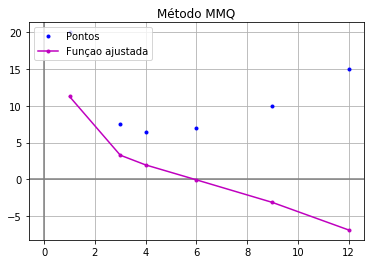

Questão 1 - Usando A = 20 
0.317907444668008
9.97887323943662
[10.29678068  6.18745808  7.58123742 13.10781355 26.85926671 46.6102448 ]


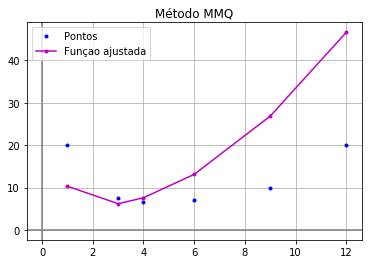

Questão 1 - Usando A = 25 
0.6901408450704225
8.640845070422536
[  9.33098592   9.0915493   13.20246479  26.28521127  56.86150235
 100.10035211]


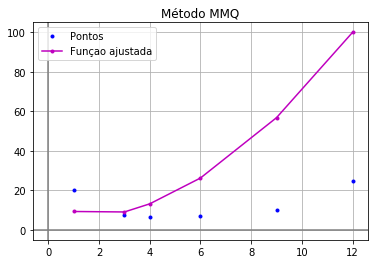

Questão 1 - Usando A = 15 
-0.05432595573440644
11.316901408450704
[11.26257545  3.28336687  1.96001006 -0.06958417 -3.14296892 -6.87986251]


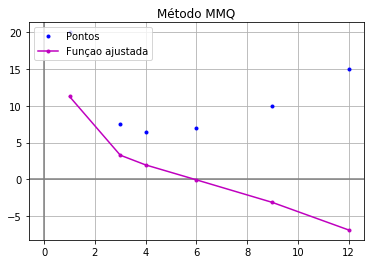

Questão 1 - Usando A = 20 
0.317907444668008
9.97887323943662
[10.29678068  6.18745808  7.58123742 13.10781355 26.85926671 46.6102448 ]


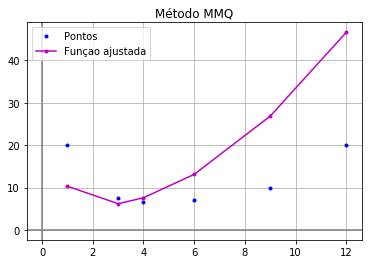

Questão 1 - Usando A = 25 
0.6901408450704225
8.640845070422536
[  9.33098592   9.0915493   13.20246479  26.28521127  56.86150235
 100.10035211]


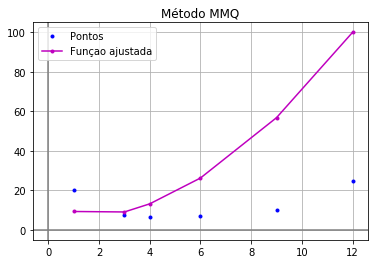

In [29]:
print('Questão 1 - Usando A = 15 ')
x = [1, 3, 4, 6, 9, 12]
y = [20, 7.5, 6.5, 7, 10, 15]
tipo = 2
MMQ(x, y, tipo)

print('Questão 1 - Usando A = 20 ')
x = [1, 3, 4, 6, 9, 12]
y = [20, 7.5, 6.5, 7, 10, 20]
tipo = 2
MMQ(x, y, tipo)

print('Questão 1 - Usando A = 25 ')
x = [1, 3, 4, 6, 9, 12]
y = [20, 7.5, 6.5, 7, 10, 25]
tipo = 2
MMQ(x, y, tipo)

Questão 2 - Primeira Tabela
-0.0045695364238444326
3.4471192052980575
[3.31917219 3.33288079 3.31917219 3.32374172 3.31917219 3.2963245
 3.31917219 3.31460265 3.34201987 3.32374172]


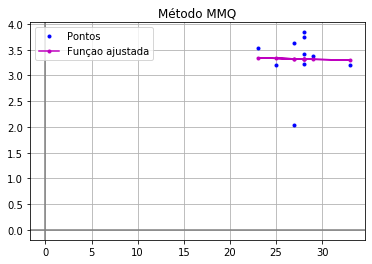

Questão 2 - Segunda Tabela
0.19272727272727383
-2.0446363636363953
[3.54445455 3.35172727 3.159      3.54445455 2.00263636 3.35172727
 3.35172727 2.96627273 3.73718182 2.58081818]


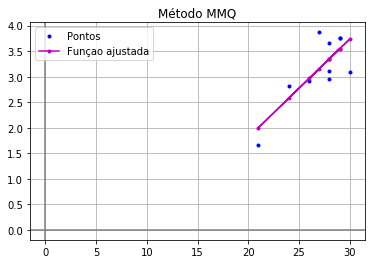

Questão 2 - Primeira Tabela
-0.0045695364238444326
3.4471192052980575
[3.31917219 3.33288079 3.31917219 3.32374172 3.31917219 3.2963245
 3.31917219 3.31460265 3.34201987 3.32374172]


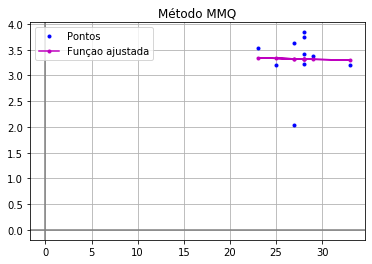

Questão 2 - Segunda Tabela
0.19272727272727383
-2.0446363636363953
[3.54445455 3.35172727 3.159      3.54445455 2.00263636 3.35172727
 3.35172727 2.96627273 3.73718182 2.58081818]


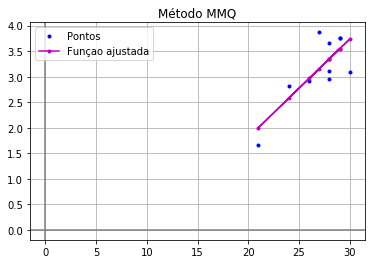

In [30]:
print('Questão 2 - Primeira Tabela')
x = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27]
y = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03]
tipo = 1
MMQ(x, y, tipo)

print('Questão 2 - Segunda Tabela')
x = [29, 28, 27, 29, 21, 28, 28, 26, 30, 24]
y = [3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]
tipo = 1
MMQ(x, y, tipo)

Questão 3 - Primeira Tabela
0.21981776765375854
7.4749430523918
[10.33257403 10.77220957 10.99202733 12.09111617 12.31093394 12.53075171
 12.97038724]


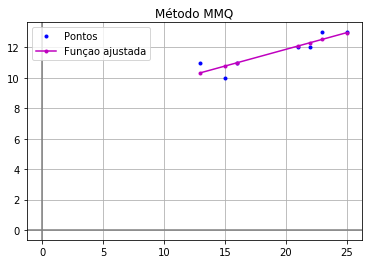

Questão 3 - Segunda Tabela
0.26949152542372884
5.303389830508475
[13.11864407 13.38813559 13.65762712 15.00508475 16.08305085 16.6220339
 20.12542373]


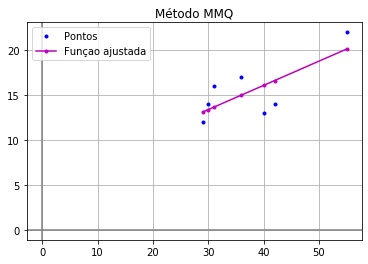

Questão 3 - Terceira Tabela
0.08189655172413793
14.043103448275861
[18.95689655 19.12068966 19.28448276 19.77586207 19.93965517 22.23275862
 24.68965517]


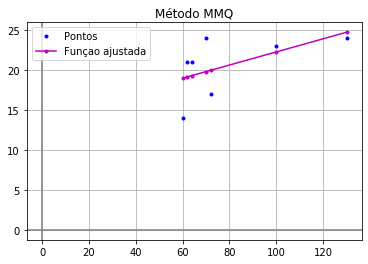

Questão 3 - Primeira Tabela
0.21981776765375854
7.4749430523918
[10.33257403 10.77220957 10.99202733 12.09111617 12.31093394 12.53075171
 12.97038724]


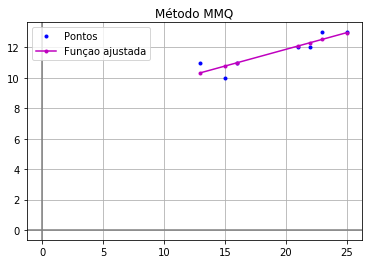

Questão 3 - Segunda Tabela
0.26949152542372884
5.303389830508475
[13.11864407 13.38813559 13.65762712 15.00508475 16.08305085 16.6220339
 20.12542373]


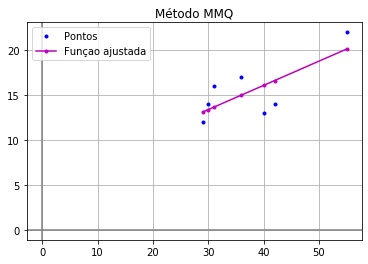

Questão 3 - Terceira Tabela
0.08189655172413793
14.043103448275861
[18.95689655 19.12068966 19.28448276 19.77586207 19.93965517 22.23275862
 24.68965517]


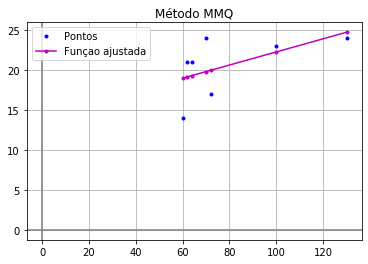

In [31]:
print('Questão 3 - Primeira Tabela')
x = [13, 15, 16, 21, 22, 23, 25]
y = [11, 10, 11, 12, 12, 13, 13]
tipo = 1
MMQ(x, y, tipo)

print('Questão 3 - Segunda Tabela')
x = [29, 30, 31, 36, 40, 42, 55]
y = [12, 14, 16, 17, 13, 14, 22]
tipo = 1
MMQ(x, y, tipo)

print('Questão 3 - Terceira Tabela')
x = [60, 62, 64, 70, 72, 100, 130]
y = [14, 21, 21, 24, 17, 23, 24]
tipo = 1
MMQ(x, y, tipo)